In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# search terms
search_terms = 'vaping'

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_terms + ' since:2021-01-01 until:2022-08-31').get_items()):
    if i > 100:
        break
    #declare the attributes to be returned
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

<ipython-input-2-c2aac23a4804>:12: FutureWarning: content is deprecated, use rawContent instead
  tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])


In [3]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2022-08-30 23:57:04+00:00,1564764167667683331,Dangers of Vaping. I had heard that there were...,CheekyLarsh
1,2022-08-30 23:56:12+00:00,1564763951476482058,This guy is VAPING at the gym right now and th...,JaySkebba
2,2022-08-30 23:55:19+00:00,1564763730604343296,@rex_woodbury Gen Z just replaced smoking with...,DevinAnimates
3,2022-08-30 23:52:06+00:00,1564762918327033859,"@Abgxlina vaping, huge eyelashes, doesnt liste...",blxxcs
4,2022-08-30 23:50:27+00:00,1564762503028031490,maybe should switch back to vaping if im stuck...,amalgam_pal
...,...,...,...,...
96,2022-08-30 22:01:16+00:00,1564735028520697857,E-Cigs and Second-Hand Vaping - Scientific Ame...,TheKingofReads
97,2022-08-30 22:00:43+00:00,1564734888062128128,"On a slightly related note, I wanted to let @A...",Chertsing
98,2022-08-30 21:57:15+00:00,1564734015261016064,@cam_cloverlea @SandroDemaio I’d recommend he ...,theheavenspave2
99,2022-08-30 21:57:12+00:00,1564734004292616193,@jakeklee23 @dcsteve5 I just don't see any rea...,_stfonzi


In [4]:
tweets_df2.to_csv("vaping.csv", index=False)

In [5]:
tweet_text_list = tweets_df2['Text'].tolist()

tweet_text_list

['Dangers of Vaping. I had heard that there were serious side effects from vaping in people late teens to mid 30s. I was just in the hospital with a person who is close to 60 and he had permanent lung damage from vaping. Please stop vaping!',
 'This guy is VAPING at the gym right now and that’s not even close to the weirdest thing I’ve ever seen here...',
 '@rex_woodbury Gen Z just replaced smoking with vaping.',
 '@Abgxlina vaping, huge eyelashes, doesnt listen to axxturel',
 'maybe should switch back to vaping if im stuck on nic, unsure.  its cheaper and much healthier i think but tradeoff is the accessibility and reduced gunkiness of it means i use way more and get way more addicted.  will decide another day.',
 '@idgafjjk vaping does the opposite.. lmao',
 'vaping is just not it.',
 'day 2 of no vaping and honestly not too terrible. just have been distracting myself when i have the want to hit a vape &amp; that’s been working 4 me',
 'OUT NOW!\n\nSpecial thanks to everyone who help

In [15]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import re

stopwords_list = {"for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vapes", "vape", "vaping", "lmao", "i", "are",
                 "is", "know", "known", "has", "been", "were", "was", "with", "have", "could", "not", "too", "it", "so", "can",
                 "you", "that", "this", "but", "at", "my", "just", "that", "what", "if", "as", "they", "be", "all", "its", "me", "thing",
                 "will", "now", "like", "who", "had", "about", "or", "about", "he", "when", "up", "into", "there", "s", "out", "instead",
                 "your", "people", "we", "because", "how", "should", "also", "her", "im", "did", "look", "It", "those", "got", "no", 'i', 
                'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 
                'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
                'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
                'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
                'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                "won't", 'wouldn', "wouldn't", "want", "get", "among", "would"}

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords_list]
    temp = " ".join(word for word in temp)
    return temp

In [16]:
my_results = [clean_tweet(tw) for tw in tweet_text_list]
my_results

<ipython-input-15-d6ecd110ba27>:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['dangers heard serious side effects late teens mid 30s hospital person close 60 permanent lung damage please stop',
 'guy gym right even close weirdest ever seen',
 'gen z replaced smoking',
 'huge eyelashes doesnt listen axxturel',
 'maybe switch back stuck nic unsure cheaper much healthier think tradeoff accessibility reduced gunkiness means use way way addicted decide another day',
 'opposite',
 '',
 'day 2 honestly terrible distracting hit amp working 4',
 'special thanks everyone helped make newest documentary short mouths link',
 'security guard busts bathroom',
 'heavily 6 years serum test checked 1003 ng dl gt 97 5th percentile non obese men ages 19 39',
 'kind sad seeing coworkers go cigarettes',
 'closing 1 bathrooms entire school day',
 'amp far often asked amp says relaxing',
 'ok figured stat funded mike bloomberg doesnt matter proven best way smokers cigarettes nicotine innocuous caffeine even fda starting clue',
 'feel replaced better',
 'shall adjourn ikea sofa puts ja

In [17]:
myresults_longtext = " ".join(text for text in my_results)
myresults_longtext 

'dangers heard serious side effects late teens mid 30s hospital person close 60 permanent lung damage please stop guy gym right even close weirdest ever seen gen z replaced smoking huge eyelashes doesnt listen axxturel maybe switch back stuck nic unsure cheaper much healthier think tradeoff accessibility reduced gunkiness means use way way addicted decide another day opposite  day 2 honestly terrible distracting hit amp working 4 special thanks everyone helped make newest documentary short mouths link security guard busts bathroom heavily 6 years serum test checked 1003 ng dl gt 97 5th percentile non obese men ages 19 39 kind sad seeing coworkers go cigarettes closing 1 bathrooms entire school day amp far often asked amp says relaxing ok figured stat funded mike bloomberg doesnt matter proven best way smokers cigarettes nicotine innocuous caffeine even fda starting clue feel replaced better shall adjourn ikea sofa puts jacket exta oh girl smoking done detrimental damages 100 smoking ni

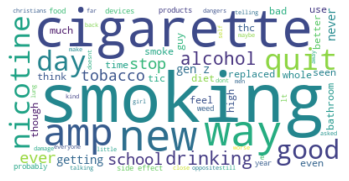

In [18]:
# Generate a word cloud image
# Import libraries required for WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stopwords_list, max_words=70, background_color="white").generate(myresults_longtext )

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
wordcloud.to_file("tweets_on_vaping.png")